# DS 3000 - Final Project

# Predicting NBA Players' Salaries

**Student Names**: Aryan 

**Date**: December 9th, 2022

## Objective

We are all really big basketball fans. We all love watching and playing basketball, which is why we wanted our project to have something to do with the NBA (National Basketball Association). The objective of our project is to create a machine learning model which uses NBA player statistics from the 2021-2022 season to determine their salaries for that same season. In order to do so, we obtained two datasets, one with player statistics for the season, and the other with player salaries for the season. Since NBA players do earn very high salaries annually, instead of having our model predict the specific number for their salary, we will create brackets that each of their salaries may fall into, and then predict players' salary brackets using our model. First, we will need to clean and prep each of these datasets, and then we will be able to join them together. After that, we can determine which features will be used in our models, and will test different models on their ability to predict the salary bracket of a player accurately. 

## Exploratory Data Analysis

### Loading in NBA Player Stats from the 2021-2022 Season

In [2]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
#Loading in the statistical data from a csv and checking to see if it was imported correctly
stats_df = pd.read_csv('stats.csv')
stats_df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,adamsst01
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,aldamsa01
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,aldrila01
5,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,alexani01
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,...,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8,alexani01
7,6,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,...,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5,alexani01
8,7,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,...,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,allengr01
9,8,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,...,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,allenja01


### Inspecting the NBA Player Stats Data

In [4]:
# Printing the dimensions of the data
print(f"There are {stats_df.shape[0]} observations in the data set.")
print(f"There are {stats_df.shape[1]} columns in the data set. \n")

#Printing information about the data, including the data types of every column
print(stats_df.dtypes)

There are 812 observations in the data set.
There are 31 columns in the data set. 

Rk                     int64
Player                object
Pos                   object
Age                    int64
Tm                    object
G                      int64
GS                     int64
MP                   float64
FG                   float64
FGA                  float64
FG%                  float64
3P                   float64
3PA                  float64
3P%                  float64
2P                   float64
2PA                  float64
2P%                  float64
eFG%                 float64
FT                   float64
FTA                  float64
FT%                  float64
ORB                  float64
DRB                  float64
TRB                  float64
AST                  float64
STL                  float64
BLK                  float64
TOV                  float64
PF                   float64
PTS                  float64
Player-additional     object
dtype: object


We have 812 players in the dataset and 31 columns of data for each player.
Some of the columns such as 'Player', 'Pos', and 'Tm' are currently objects in the dataframe. We will need to change their types to string to be more descriptive. Also, upon inspection of the head of the dataframe, we can see that there are multiple rows for certain players, which we will look into and deal with later.

### Cleaning the NBA Players Stats Data

The columns that are irrelevant in this dataframe are 'Rk', which just tells us the players rank alphabetically, and 'Player-additional', which just gives us a abbreviation for each player with their first and last name. Without any further exploration, neither of these will be important in predicting a player's salary and thus, we will not need them in our data. We will drop these columns from the dataframe.

In [5]:
#Deleting the columns that are irrelevant
stats_df.drop(columns=['Rk', 'Player-additional'], inplace=True)
stats_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


The player column is not very descriptive, so we will rename it.

In [6]:
#Renaming the 'Player' column to have a more descriptive name
stats_df = stats_df.rename(columns={'Player': 'Player Name'})
stats_df.head()

,Player Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


Now, we will start eliminating the nulls in the data.

In [7]:
#Checking the null counts of the data
print(stats_df.isnull().sum())

Player Name     0
Pos             0
Age             0
Tm              0
G               0
GS              0
MP              0
FG              0
FGA             0
FG%            15
3P              0
3PA             0
3P%            72
2P              0
2PA             0
2P%            28
eFG%           15
FT              0
FTA             0
FT%            97
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
dtype: int64


In [8]:
#Count the frequency of missing values in each row
stats_df.isnull().sum(axis=1).sort_values(ascending = False).head(20)


50     5
238    5
538    5
529    5
166    5
165    5
279    5
508    5
369    5
669    5
802    5
123    5
199    5
653    4
451    4
482    2
589    2
319    2
770    2
53     2
dtype: int64

After inspecting the null counts, thre are a few rows where the total number of nulls is unusually high. We will remove all the data with at least 4 null values and will impute the rest of the null values to the mean.

In [9]:
#Filtering the data frame to keep the rows with less than 4 nulls
stats_df = stats_df[stats_df.isnull().sum(axis=1) < 4]
print(stats_df.shape)
print(stats_df.isnull().sum())


(797, 29)
Player Name     0
Pos             0
Age             0
Tm              0
G               0
GS              0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%            57
2P              0
2PA             0
2P%            13
eFG%            0
FT              0
FTA             0
FT%            84
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
dtype: int64


In [10]:
#Imputing the null values to the mean for every column that still has null values
columns = ['3P%', '2P%', 'FT%']

for col in columns:
        stats_df.loc[stats_df[col].isna(), col] = stats_df[col].mean()

In [11]:
#Printing out the null counts again to ensure that all remaining nulls were imputed
print(stats_df.isnull().sum())

Player Name    0
Pos            0
Age            0
Tm             0
G              0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
2P             0
2PA            0
2P%            0
eFG%           0
FT             0
FTA            0
FT%            0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
dtype: int64


We have succesfully dealt with all of the null data. One other thing we noticed with the dataset was that when a player got traded, this is represented with multiple rows in the dataset, 1 for their total stats for the season and 1 for each team that they played on. We will only keep the row representing the total stats for the season and remove the other rows representing partial stats.

In [12]:
#Deleting the extra columns where a player's name appears more than once
stats_df.drop_duplicates(subset=['Player Name'], inplace=True)
print(stats_df.shape)
stats_df.head(10)


(596, 29)


,Player Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
5,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,...,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
8,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,0.448,...,0.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
9,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,0.677,...,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1
10,Jose Alvarado,PG,23,NOP,54,1,15.4,2.4,5.4,0.446,...,0.679,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1
11,Justin Anderson,SF,28,TOT,16,6,19.8,2.3,5.9,0.379,...,0.789,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4


After removing multiple rows for players who have been traded, we now have 596 players left in our dataset. Although this may seem like we removed a lot of data, it was important since there really should only be one row per player. This will make it easier for us to match the players to their salaries later on as well. Now, all we must do is change the types of the columns to be more accurate/specific.

In [13]:
#Changing the types of specific columns in the dataframe
stats_df['Player Name'] = stats_df['Player Name'].astype('string')
stats_df['Pos'] = stats_df['Pos'].astype('string')
stats_df['Tm'] = stats_df['Tm'].astype('string')

print(stats_df.dtypes)


Player Name     string
Pos             string
Age              int64
Tm              string
G                int64
GS               int64
MP             float64
FG             float64
FGA            float64
FG%            float64
3P             float64
3PA            float64
3P%            float64
2P             float64
2PA            float64
2P%            float64
eFG%           float64
FT             float64
FTA            float64
FT%            float64
ORB            float64
DRB            float64
TRB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
PF             float64
PTS            float64
dtype: object


We have successfully changed the data types and cleaned this dataset.

### Visualizing the Data for the NBA Player Stats

Since there are still so many variables and we aren't sure which ones will affect salary since we haven't merged our datasets together yet, we can simply visualize the frequency of some of the variables. 

AxesSubplot(0.125,0.125;0.775x0.755)


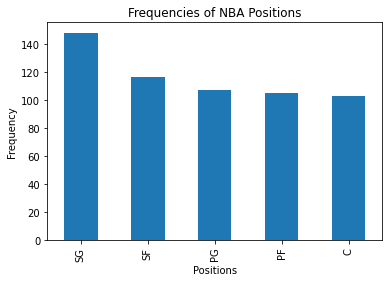

In [14]:
#Creating a bar chart for the position of NBA players
plt.title('Frequencies of NBA Positions')
plt.xlabel('Positions')
plt.ylabel('Frequency')
print(stats_df['Pos'].value_counts().head().plot(kind="bar"))


This bar chart shows us that there is a relatively even distribution of players amongst positions in the NBA during the 2021-2022 season. Shooting Guard was the most common position, followed by Small Forward, and the other 3 positions (Point Guard, Power Forward, and Center) all had almost identical frequencies.

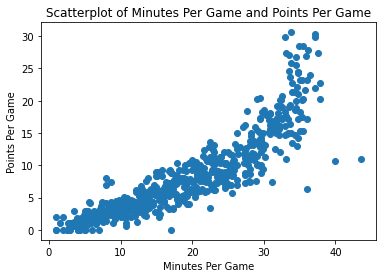

In [15]:
#Visualizing the relationship between Minutes Per Game and Points Per Game
mpg = stats_df['MP']
ppg = stats_df['PTS']

plt.scatter(mpg, ppg)
plt.title('Scatterplot of Minutes Per Game and Points Per Game')
plt.xlabel('Minutes Per Game')
plt.ylabel('Points Per Game')
plt.show()

From this scatterplot, we can see that there is a strong positive correlation between minutes per game and points per game scored. There appears to be a few outliers, but the relationship is easily noticeable.

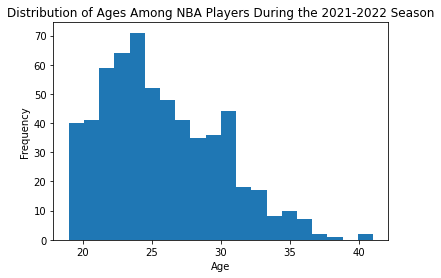

In [16]:
#Visualizing the Different Ages Among the League
ages = stats_df['Age']
plt.hist(x=stats_df['Age'], bins=20)
plt.title('Distribution of Ages Among NBA Players During the 2021-2022 Season')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can clearly tell from this histogram that players in the league tend to be younger. The majority of players are less than 30 years old and almost all of the players are less than 35 years old.

### Loading in NBA Player Salaries from the 2021-2022 Season

In [17]:
#Loading the salary data directly from the website and checking to see if it has been imported properly
salary_data = pd.read_html('https://hoopshype.com/salaries/players/2021-2022/')
salary_df = pd.DataFrame(salary_data[0])
salary_df.head()

,Unnamed: 0,Player,2021/22,2021/22(*)
0,1.0,Stephen Curry,"$45,780,966","$49,928,610"
1,2.0,John Wall,"$44,310,840","$48,325,294"
2,2.0,James Harden,"$44,310,840","$48,325,294"
3,4.0,Russell Westbrook,"$44,211,146","$48,216,568"
4,5.0,Kevin Durant,"$42,018,900","$45,825,710"


### Inspecting the NBA Player Salaries Data


In [18]:
# Printing the dimensions of the data
print(f"There are {salary_df.shape[0]} observations in the data set.")
print(f"There are {salary_df.shape[1]} columns in the data set.")

#Printing information about the data, including the data types of every column
print(salary_df.dtypes)

There are 653 observations in the data set.
There are 4 columns in the data set.
Unnamed: 0    float64
Player         object
2021/22        object
2021/22(*)     object
dtype: object


We currently have salaries for 653 players in our dataset, and 4 columns for each. Some of the colums will end up being deleted during the data cleaning. We will also need to make the column types more accurate, especially for salaries, which will require some extra work.

### Cleaning the NBA Players Salaries Data

We have unneeded columns in our dataframe. All we are really interested in is the player's name and their salary. The 'Unnamed: 0' column just represents the player's rank by salary, which we don't need. The '2021/22(*)' column represents their adjusted salary for the 2022-2023 season, which is not needed either. We will remove these unneeded columns.

In [19]:
#Dropping the columns that we don't need
salary_df.drop(columns=['Unnamed: 0', '2021/22(*)'], inplace=True)
salary_df.head()

,Player,2021/22
0,Stephen Curry,"$45,780,966"
1,John Wall,"$44,310,840"
2,James Harden,"$44,310,840"
3,Russell Westbrook,"$44,211,146"
4,Kevin Durant,"$42,018,900"


We have successfully deleted the columns that we don't need. Next, we will rename the columns to be more descriptive/accurate.

In [20]:
#Renaming the columns to be more descriptive
salary_df.rename(columns={'Player': 'Player Name'}, inplace=True)
salary_df.rename(columns={'2021/22': 'Salary'}, inplace=True)
salary_df.head()



,Player Name,Salary
0,Stephen Curry,"$45,780,966"
1,John Wall,"$44,310,840"
2,James Harden,"$44,310,840"
3,Russell Westbrook,"$44,211,146"
4,Kevin Durant,"$42,018,900"


In [21]:
#Checking the null counts of the salary dataframe
print(salary_df.isnull().sum())

Player Name    0
Salary         0
dtype: int64


There are no nulls to be dealt with in the data. Now, we can fix the data types of the columns in this dataframe. We can easily change the type of 'Player Name' to string, but we changing the type of 'Salary' to int will not be as easy, since it has '$' and ',' characters within each salary. We must remove these characters and then we will be able to change the data type to int.

In [22]:
#Removing the unwanted characters from the salary column
salary_df['Salary'] = salary_df['Salary'].str.replace('$', '')
salary_df['Salary'] = salary_df['Salary'].str.replace(',', '')
salary_df.head()

/var/folders/xh/1st0ths523x83x3wbhzsm7200000gn/T/ipykernel_25206/78155285.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salary_df['Salary'] = salary_df['Salary'].str.replace('$', '')


,Player Name,Salary
0,Stephen Curry,45780966
1,John Wall,44310840
2,James Harden,44310840
3,Russell Westbrook,44211146
4,Kevin Durant,42018900


Now that we have removed the unnecessary characters, we can change our data types.

In [23]:
#Changing the types of the columns
salary_df['Player Name'] = salary_df['Player Name'].astype('string')
salary_df['Salary'] = salary_df['Salary'].astype(int)
print(salary_df.dtypes)



Player Name    string
Salary          int64
dtype: object


### Visualizing the Data for the NBA Player Salaries 

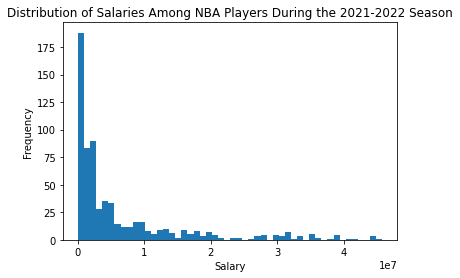

In [24]:
#Creating a histogram to show the distribution of player salaries
plt.hist(x=salary_df['Salary'], bins=50)
plt.title('Distribution of Salaries Among NBA Players During the 2021-2022 Season')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

The scale along the bottom of the graph for the Salary variable is in units of 10,000,000s of dollars. We can see that the data is heavily skewed right and that many NBA players have a salary of less than 10,000,000 dollars. More so, many NBA players have a salary of 1,000,000 dollars or less, which is somewhat surprising, because we always think of extremely large salaries when it comes to the NBA.

## Combining the Two Dataframes

Now that we have cleaned and explored both of our datasets individually, we must now combine them such that we have one dataframe which contains all of the statistical information as well as salary for a player.

In [25]:
#Creating a new column in our stats dataframe for salaries and initializing every value to 0
stats_df['Salary'] = 0
stats_df.head()

,Player Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,0
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,0
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,0
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,0
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,0


To match up a player's stats to their salary in the other dataframe, we will need to be matching up the names of players. For this, we will make them all uppercase and strip any extra spaces to ensure that there are no differences between the way a player's name is represented.

In [26]:
#Changing both columns to uppercase
stats_df['Player Name'] = stats_df['Player Name'].str.upper()
salary_df['Player Name'] = salary_df['Player Name'].str.upper()

#Stripping extra spaces off both columns if they exist
stats_df['Player Name'] = stats_df['Player Name'].str.strip()
salary_df['Player Name'] = salary_df['Player Name'].str.strip()

stats_df.head()


,Player Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,PRECIOUS ACHIUWA,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,0
1,STEVEN ADAMS,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,0
2,BAM ADEBAYO,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,0
3,SANTI ALDAMA,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,0
4,LAMARCUS ALDRIDGE,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,0


In [27]:
#Append the salary in salary_df to the stats_df by name
for name in salary_df['Player Name']:
    stats_df.loc[stats_df['Player Name'] == name, 'Salary'] = salary_df.loc[salary_df['Player Name'] == name, 'Salary'].values[0]

stats_df.head(20)


,Player Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,PRECIOUS ACHIUWA,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2711280
1,STEVEN ADAMS,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,17073171
2,BAM ADEBAYO,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,28103500
3,SANTI ALDAMA,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,0
4,LAMARCUS ALDRIDGE,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2641691
5,NICKEIL ALEXANDER-WALKER,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,3261480
8,GRAYSON ALLEN,SG,26,MIL,66,61,27.3,3.9,8.6,0.448,...,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,4054695
9,JARRETT ALLEN,C,23,CLE,56,56,32.3,6.6,9.7,0.677,...,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,20000000
10,JOSE ALVARADO,PG,23,NOP,54,1,15.4,2.4,5.4,0.446,...,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1,1925406
11,JUSTIN ANDERSON,SF,28,TOT,16,6,19.8,2.3,5.9,0.379,...,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4,445828


We have succesfully attached a player's salary to their row in the dataframe containing all stats for every player that we have a salary for. Since the two datasets didn't align perfectly, we must now go through our stats dataframe and delete players who still have a salary of 0 (what we initialized them all to be), which means that our salary dataframe didn't contain data on how much they got paid.

In [28]:
# Remove the rows that have a salary of 0
stats_df = stats_df[stats_df['Salary'] != 0]
stats_df.head(20)

,Player Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,PRECIOUS ACHIUWA,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2711280
1,STEVEN ADAMS,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,17073171
2,BAM ADEBAYO,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,28103500
4,LAMARCUS ALDRIDGE,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2641691
5,NICKEIL ALEXANDER-WALKER,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,3261480
8,GRAYSON ALLEN,SG,26,MIL,66,61,27.3,3.9,8.6,0.448,...,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,4054695
9,JARRETT ALLEN,C,23,CLE,56,56,32.3,6.6,9.7,0.677,...,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,20000000
10,JOSE ALVARADO,PG,23,NOP,54,1,15.4,2.4,5.4,0.446,...,0.5,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1,1925406
11,JUSTIN ANDERSON,SF,28,TOT,16,6,19.8,2.3,5.9,0.379,...,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4,445828
14,KYLE ANDERSON,PF,28,MEM,69,11,21.5,3.0,6.8,0.446,...,1.0,4.3,5.3,2.7,1.1,0.7,1.0,1.6,7.6,9937150


### Creating Salary Brackets

Since the values that we are working with are extremely high and it will be difficult to evaluate the accuracy of our models with measures such as mean squared error, we will create 10 salary brackets of equal size. Our model will be used to predict which salary bracket a player's salary falls into, but first we need to create this column based on the data.

In [29]:
#Obtaining a statistical summary for salary
summary = stats_df['Salary'].describe()
print(f"There are {round(summary[0], 2)} values in this column.")
print(f"The mean of the dataset is {round(summary[1], 2)}.")
print(f"The standard deviation of the dataset is {round(summary[2], 2)}.")
print(f"The minimum of the dataset is {round(summary[3], 2)}.")
print(f"The 1st quartile of the dataset is {round(summary[4], 2)}.")
print(f"The median of the dataset is {round(summary[5], 2)}.")
print(f"The 3rd quartile of the dataset is {round(summary[6], 2)}.")
print(f"The maximium of the dataset is {round(summary[7], 2)}.")

There are 522.0 values in this column.
The mean of the dataset is 6491951.51.
The standard deviation of the dataset is 9264702.18.
The minimum of the dataset is 13294.0.
The 1st quartile of the dataset is 822191.25.
The median of the dataset is 2395589.0.
The 3rd quartile of the dataset is 8205638.5.
The maximium of the dataset is 45780966.0.


Based on this statistical summary, we know that all of our data is between 0 and 50 million. We can make 10 brackets, each of size 5 million, so that the salaries span from 0 to 50 million between our 10 brackets and cover all the players.

In [30]:
#Looping through the players and populating the salary bracket column for each player
for name in stats_df['Player Name']:
    player = stats_df[stats_df['Player Name'] == name]
    salary = player['Salary'].values[0]
    if salary > 0 and salary < 4999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 1
    elif salary < 9999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 2
    elif salary < 14999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 3
    elif salary < 19999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 4
    elif salary < 24999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 5
    elif salary < 29999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 6
    elif salary < 34999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 7
    elif salary < 39999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 8
    elif salary < 44999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 9
    elif salary < 49999999:
        stats_df.loc[stats_df['Player Name'] == name, 'Salary Bracket'] = 10

stats_df.head(20)

,Player Name,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Salary Bracket
0,PRECIOUS ACHIUWA,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2711280,1.0
1,STEVEN ADAMS,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,17073171,4.0
2,BAM ADEBAYO,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,28103500,6.0
4,LAMARCUS ALDRIDGE,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2641691,1.0
5,NICKEIL ALEXANDER-WALKER,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,...,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,3261480,1.0
8,GRAYSON ALLEN,SG,26,MIL,66,61,27.3,3.9,8.6,0.448,...,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,4054695,1.0
9,JARRETT ALLEN,C,23,CLE,56,56,32.3,6.6,9.7,0.677,...,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,20000000,5.0
10,JOSE ALVARADO,PG,23,NOP,54,1,15.4,2.4,5.4,0.446,...,1.4,1.9,2.8,1.3,0.1,0.7,1.4,6.1,1925406,1.0
11,JUSTIN ANDERSON,SF,28,TOT,16,6,19.8,2.3,5.9,0.379,...,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4,445828,1.0
14,KYLE ANDERSON,PF,28,MEM,69,11,21.5,3.0,6.8,0.446,...,4.3,5.3,2.7,1.1,0.7,1.0,1.6,7.6,9937150,2.0


## Evaluating Models

### Encoding the Categorical Data


In [31]:
#Encoding the categorical variables
stats_df = pd.get_dummies(stats_df, columns=['Pos', 'Tm'])
stats_df.head()

,Player Name,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,PRECIOUS ACHIUWA,22,73,28,23.6,3.6,8.3,0.439,0.8,2.1,...,0,0,0,0,0,0,1,0,0,0
1,STEVEN ADAMS,28,76,75,26.3,2.8,5.1,0.547,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,BAM ADEBAYO,24,56,56,32.6,7.3,13.0,0.557,0.0,0.1,...,0,0,0,0,0,0,0,0,0,0
4,LAMARCUS ALDRIDGE,36,47,12,22.3,5.4,9.7,0.550,0.3,1.0,...,0,0,0,0,0,0,0,0,0,0
5,NICKEIL ALEXANDER-WALKER,23,65,21,22.6,3.9,10.5,0.372,1.6,5.2,...,0,0,0,0,0,0,0,1,0,0


### Finding Correlation of Potential Features

After encoding the categorical data, we have over 50 columns that may be used to predict salary. We can check the correlation of each of these columns with the salary column to view their potential importance. 

In [32]:
#A Player's Name now has no importance to us anymore since we were only using this to match their stats with their salary, so we can delete this column
stats_df.drop(columns=['Player Name'], inplace=True)
stats_df.head()


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,22,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,...,0,0,0,0,0,0,1,0,0,0
1,28,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,...,0,0,0,0,0,0,0,0,0,0
2,24,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,...,0,0,0,0,0,0,0,0,0,0
4,36,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,...,0,0,0,0,0,0,0,0,0,0
5,23,65,21,22.6,3.9,10.5,0.372,1.6,5.2,0.311,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

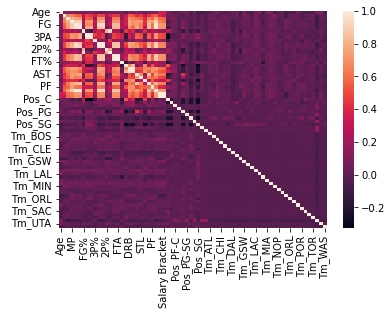

In [33]:
#Displaying a heatmap of the correlations with every variable that we currently have in our dataframe
sns.heatmap(stats_df.corr())

In [34]:
#Calculating the correlation between the columns and salary
for column_name in stats_df.columns:
    corr = round((stats_df['Salary Bracket'].corr(stats_df[column_name])),2)
    print(f'Correlation between Salary Bracket and {column_name} is: {corr}.')

Correlation between Salary Bracket and Age is: 0.35.
Correlation between Salary Bracket and G is: 0.32.
Correlation between Salary Bracket and GS is: 0.57.
Correlation between Salary Bracket and MP is: 0.6.
Correlation between Salary Bracket and FG is: 0.7.
Correlation between Salary Bracket and FGA is: 0.69.
Correlation between Salary Bracket and FG% is: 0.12.
Correlation between Salary Bracket and 3P is: 0.49.
Correlation between Salary Bracket and 3PA is: 0.49.
Correlation between Salary Bracket and 3P% is: 0.12.
Correlation between Salary Bracket and 2P is: 0.65.
Correlation between Salary Bracket and 2PA is: 0.66.
Correlation between Salary Bracket and 2P% is: 0.06.
Correlation between Salary Bracket and eFG% is: 0.13.
Correlation between Salary Bracket and FT is: 0.7.
Correlation between Salary Bracket and FTA is: 0.69.
Correlation between Salary Bracket and FT% is: 0.17.
Correlation between Salary Bracket and ORB is: 0.19.
Correlation between Salary Bracket and DRB is: 0.59.
Cor

After inspection, it appears as if the encoded team columns and position columns after encoding have a very minimal correlation with salary bracket, since there are so many of them. We will set 0.25 as the minimum threshold needed for the correlation Salary Bracket and a column to have it be used as the feature in the model All of the remaining columns can be removed since they won't be used in the model.

In [35]:
#Creating a list of the features with a correlation of 0.25 or greater
desired_features = []

#Either adding a column to the list of features, or removing it from the dataframe
for column_name in stats_df.columns:
    corr = round((stats_df['Salary Bracket'].corr(stats_df[column_name])),2)
    if (corr >= 0.25):
        if (column_name != 'Salary Bracket') and (column_name != 'Salary'):
            desired_features.append(column_name)
    else:
        stats_df.drop(columns=[column_name], inplace=True)

print(f'The features that we will use in our model are {desired_features}')

The features that we will use in our model are ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [36]:
#Viewing the dataframe after we removed unneeded columns
stats_df.head()

,Age,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Salary Bracket
0,22,73,28,23.6,3.6,8.3,0.8,2.1,2.9,6.1,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2711280,1.0
1,28,76,75,26.3,2.8,5.1,0.0,0.0,2.8,5.0,...,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,17073171,4.0
2,24,56,56,32.6,7.3,13.0,0.0,0.1,7.3,12.9,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,28103500,6.0
4,36,47,12,22.3,5.4,9.7,0.3,1.0,5.1,8.8,...,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2641691,1.0
5,23,65,21,22.6,3.9,10.5,1.6,5.2,2.3,5.3,...,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,3261480,1.0


<AxesSubplot:>

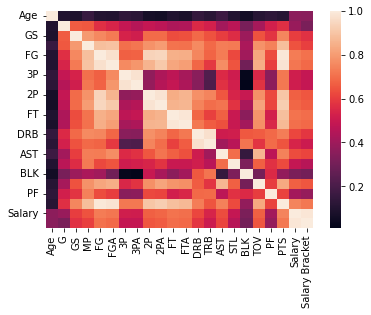

In [37]:
#Viewing the heatmap of correlations with the remaining columns
sns.heatmap(stats_df.corr())

### Splitting the Data into Test and Train Data

In [38]:
# initialize features
X   = stats_df[desired_features]
y   = stats_df['Salary Bracket']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,  
                                                    test_size=0.3,
                                                    random_state=7
                                                   )

### K-NN Classifier Model

In [39]:
#Creating the model and fitting it to the training data
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
#Predicting the values for the test set
y_pred = knn.predict(X_test)

In [41]:
# Evaluating the accuracy of our model
accuracy = round(knn.score(X_test, y_test), 2)
print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.66


An accuracy of 0.66 isn't bad, but we can tune the hyperparameters to see if we can improve upon this.

### Tuning Hyperparameters for the K-NN Classifier Model

In [42]:
#Listing the hyperparameters that we want to tune.
params= {'n_neighbors' : np.arange(1, 30),
         'leaf_size' : np.arange(10, 50),
         'p' : [1,2]}


#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
knn_grid = GridSearchCV(estimator = knn_2, param_grid = params, cv=5)
knn_grid.fit(X_train, y_train)


#Print The value of best Hyperparameters
print(f'Best Parameters: {knn_grid.best_params_}')
print(f'Best Score: {round(knn_grid.best_score_, 2)}')

/Users/aryankale22/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'leaf_size': 10, 'n_neighbors': 8, 'p': 2}
Best Score: 0.69


For the k-nn model, the best hyperparameters are leaf_size = 10, n_neighbors = 8, and p = 2. This gives us an accuracy of 0.69.

### Random Forest Classifier Model

In [43]:
#Building the classifier and fitting it to the training data
rf = RandomForestClassifier(criterion='entropy', random_state = 7)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

In [44]:
#predict the labels for the test set
y_pred   = rf.predict(X_test)

# Prediction accuracy
accuracy = round(rf.score(X_test, y_test), 2)
print(f'The accuracy of the model is: {accuracy}')


The accuracy of the model is: 0.69


The accuracy of this model is 0.69, which isn't bad. We can try to tune the hyperparameters to increase this score.

### Tuning Hyperparameters for the Random Forest Classifier Model

In [45]:
#Listing the hyperparameters that we want to tune.
params= {'n_estimators' : np.arange(1, 100),
        'max_depth' : np.arange(1,10)}


#Create new Random Forest object
rf_2 = RandomForestClassifier(criterion='entropy', random_state = 7)

#Use GridSearch
rf_2_grid = GridSearchCV(estimator = rf_2, param_grid = params, cv=5)
rf_2_grid.fit(X_train, y_train)


#Print The value of best Hyperparameters
print(f'Best Parameters: {rf_2_grid.best_params_}')
print(f'Best Score: {round(rf_2_grid.best_score_, 2)}')

/Users/aryankale22/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 8, 'n_estimators': 41}
Best Score: 0.72


The best hyperparameters for the Random Forest Classifier Model are max_depth = 8 and n_estimators = 41. This produces an accuracy of 0.72, which is better than the k-nn classifier model.

### Support Vector Machine

In [46]:
#Making copies of the data that we have
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

#Scaling the numerical data (we only have numerical data)
scaler = StandardScaler()
scaler.fit(X_train_copy[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']])

X_train_copy[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']] = scaler.transform(X_train_copy[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]) 

In [47]:
#Initializing the classifier
svm = SVC() 
svm.fit(X_train_copy, y_train)

SVC()

In [48]:
#scale the new/test data
X_test_copy[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']] = scaler.transform(X_test_copy[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]) 

In [49]:
#predict the labels for the test set
y_pred   = svm.predict(X_test_copy)

# Prediction accuracy
accuracy = round(svm.score(X_test_copy, y_test), 2)
print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.67


The accuracy of this model is 0.67, which means that it is accurate around 2/3 of the time. Let's see if we can increase this by tuning the hyper parameters.

### Tuning Hyperparameters for the Support Vector Machine

In [50]:
#Listing the hyperparameters that we want to tune.
params = {'C': np.arange(1, 20),
         'gamma': np.arange(1, 10)}

#Initialize a new SVM object
svm_2 = SVC()

#initialize Grid Search with Cross Validation
svm_grid = GridSearchCV(estimator = svm_2, param_grid = params, cv=5)
svm_grid.fit(X_train_copy, y_train)


#Print The value of best Hyperparameters
print(f'Best Parameters: {svm_grid.best_params_}')
print(f'Best Score: {round(svm_grid.best_score_, 2)}')


/Users/aryankale22/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 1, 'gamma': 1}
Best Score: 0.67


The best hyperparameters for the Support Vector Machine are C = 1 and gamma = 1 This produces an accuracy of 0.67, which is worse than both the K-NN Classifier Model and the Random Forest Classifier Model.

## Best Model

After tuning the hyperparameters for all 3 models, we have come to the conclusion that a Random Forest Classifier with 41 trees yields the highest accuracy. We can now visualize the importance of each of the features in this model in a bar chart

<function matplotlib.pyplot.show(close=None, block=None)>

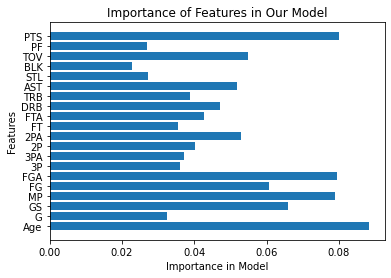

In [52]:
#Visualizing the importance of the features of the model
rf_2.fit(X_train, y_train)

model_feature_names = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
plt.barh(model_feature_names, rf_2.feature_importances_)
plt.title("Importance of Features in Our Model")
plt.xlabel("Importance in Model")
plt.ylabel("Features")
plt.show

From the graph above, Age, Points, Minutes Played, and Field Goals Attempted had the greatest impact on the model. Certain defensive stats like Block and Steals were not as important. It was a little surprising that stats such as Rebounds and Assists didn't have much importance in the model either. Regardless, it appears as if there were no features that had a very minimal impact on the model.

## Conclusion

After cleaning and merging the data, we were able to create a few different machine learning models to predict the salary bracket that each player falls into. We used the K-NN Classifier, Random Forest Classifier, and Support Vector Machines, to create different models. After tuning the hyperparameters for the three different models, we found that the Random Forest Classifier is the best model for our project, producing an accuracy of 0.72 when the hyperparameters were tuned such that 'max_depth' = 8 and 'n_estimators' = 41. We were hoping for an accuracy of around 0.75, and while we weren't able to reach that with any model, we have gotten pretty close. The reason that we believe our accuracy wasn't able to be higher than this, was because there are many different factors that affect a player's salary, other than just their statistics on the season. There are many other skills in the NBA, such as hustle, communication, leadership, and many more that aren't necessarily trackable, but definitely have an impact on the player's impact and value, and thus their salary. If we were able to create a model with an accuracy of 0.90 or greater, then this would be very impressive. This would make it very easy for owners of NBA teams to determine how much to pay their players based on their statistical performance. Determining a player's worth and their salary still remains a big problem in the NBA today, and we believe our model does a solid job at predicting this.